## Text mining project - nuclear plants safety

Merge the datasets into a single dataframe. Only 250 articles can be downloaded from INIS at a time. 

In [62]:
import pandas as pd
import numpy as np

df1=pd.read_json('C:/Users/ivobo/notebook/dataset/250.json') #from the INIS repository ('nuclear safety' (abstract), academic journals, english)
df2=pd.read_json('C:/Users/ivobo/notebook/dataset/500.json')
df3=pd.read_json('C:/Users/ivobo/notebook/dataset/750.json')
df4=pd.read_json('C:/Users/ivobo/notebook/dataset/1000.json')
df5=pd.read_json('C:/Users/ivobo/notebook/dataset/1250.json')

frames=[]
for i in range (1,6):
    frames.append('df'+str(i))
    
frames_obj = [eval(x) for x in frames] #To make the list of strings point to the actual dataframes

df0=pd.concat(frames_obj, ignore_index=True).drop(["corporateAuthor", "originalTitle"], axis=1) #merge dfs

df_original=df0['englishAbstract'] #to retrieve unprocessed results 

display(df0.head(10)) #check

,author,englishTitle,englishAbstract,publicationYear
0,"Mariani, L.P.",Commentary on the cost of nuclear safety,"Although adequate levels of nuclear safety have been attained, the societal and institutional approaches taken in the United States to safely harvest the fruits of nuclear power technology have been beset with economic inefficiencies. The paper discusses difficulties with nuclear regulation and complexity and politicization of overall decision-making process. Public acceptance is the key to more economical attainment of nuclear safety objectives. It alone will fuel the federal and state governments to more expeditiously move toward what they would perceive to be a public mandate for nuclear utilization",1991
1,"Corcoran, W.R. (TENERA Risk Management Services, Windsor, CT (United States))",Nuclear utility self-assessment as viewed by the corporate nuclear safety committee,"This paper discusses how corporate nuclear safety committees use the principles of self-assessment to enhance nuclear power plant safety performance. Corporate nuclear safety committees function to advise the senior nuclear power executive on matters affecting nuclear safety. These committees are required by the administrative controls section of the plant technical specifications which are part of the final safety analysis report and the operating license. Committee membership includes senior utility executives, executives from sister utilities, utility senior technical experts, and outside consultants. Current corporate nuclear safety committees often have a finely tuned intuitive feel for self-assessment that they use to probe the underlying opportunities for quality and safety enhancements. The questions prompted by the self-assessment orientation enable the utility line organization members to gain better perspectives on the characteristics of the organizational systems that they manage and work in",1992
2,"Birkhofer, A. (Gesellschaft fuer Reaktorsicherheit Forschungsgelaende, Garching (Germany))",The use of probabilistic safety assessments for improving nuclear safety in Europe,"The political changes in Europe broadened the scope of international nuclear safety matters considerably. The Western world started to receive reliable and increasingly detailed information on Eastern European nuclear technology and took note of a broad range of technical and administrative problems relevant for nuclear safety in these countries. Reunification made Germany a focus of information exchange on these matters. Here, cooperation with the former German Democratic Republic and with other Eastern European countries as well as safety analyses of Soviet-built nuclear power plants started rather early. Meanwhile, these activities are progressing toward all-European cooperation in the nuclear safety sector. This cooperation includes the use of probabilistic safety assessments (PSAs) addressing applications in both Western and Eastern Europe as well as the further development of this methodology in a converging Europe",1992
3,"Barker, F.",The 'tolerability' of nuclear risk?,"In 1988, responding to a recommendation by the Inspector at the Sizewell B Public Inquiry, the Health and Safety Executive (HSE) published a discussion document on the tolerability of risk. The Inspector considered that there was insufficient public information to allow an understanding of the basis for the regulation of nuclear safety, and so recommended that the HSE publish a document to enable public, expert and parliamentary discussion. Although the discussion document went a long way to explaining how the HSE reaches its decisions on nuclear safety in a clear and useful way, its proposals on levels of maximum tolerable risk were widely criticised, particularly at the Hinkley Point C Public Inquiry. As explained in this article, the inquiry inspector, Michael Barnes, accepted a number of the points made by objectors and suggested more stringent levels of maximum tolerable risk. In October 1

### Preprocessing - tokenize, lemmatize, remove punctuation and stopwords

Define a function to map the pos tags to a compatible format. Necessary for an effective lemmatization. 

In [63]:
import nltk
import requests
from nltk.stem import WordNetLemmatizer 
from tqdm import tqdm

def get_wordnet_pos(word):
    from nltk.corpus import wordnet
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

Define a function to tokenize, lemmatize and filter for stopwords.

In [64]:
lemmatizer = WordNetLemmatizer()

stop = open("C:/Users/ivobo/notebook/dataset/stopwords.txt", "r") 
stopwords = stop.read().split() #list of stopwords imported

import re
split_regex = r'\W+'

def tokenize(string): #function to tokenize, filter for stopwords and lemmatize
  return [lemmatizer.lemmatize(s, get_wordnet_pos(s)) for s in re.split(split_regex, string.lower())
  if s != '' and not s in stopwords]

Apply it to the dataset.

In [65]:
df0['englishAbstract'] = df0['englishAbstract'].str.replace(r'[^\w\s]', '') #remove punctuation
df0['englishAbstract'] = df0['englishAbstract'].astype("string") #turns to string

df0 = df0[df0['englishAbstract'].notna()].reset_index(drop=True) #remove na values and reset index

tqdm.pandas()
df0['englishAbstract'] = df0['englishAbstract'].progress_apply(tokenize)#apply the preprocessing steps
df_preprocessed=df0['englishAbstract'].tolist()
display(df0) #check

C:\Users\ivobo\AppData\Local\Temp\ipykernel_17540\801175491.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df0['englishAbstract'] = df0['englishAbstract'].str.replace(r'[^\w\s]', '') #remove punctuation
100%|██████████████████████████████████████████████████████████████████████████████| 1250/1250 [01:36<00:00, 12.90it/s]


,author,englishTitle,englishAbstract,publicationYear
0,"Mariani, L.P.",Commentary on the cost of nuclear safety,"[although, adequate, level, nuclear, safety, attain, societal, institutional, approach, take, united, state, safely, harvest, fruit, nuclear, power, technology, beset, economic, inefficiency, paper, discus, difficulty, nuclear, regulation, complexity, politicization, overall, decisionmaking, process, public, acceptance, key, economical, attainment, nuclear, safety, objective, alone, fuel, federal, state, government, expeditiously, move, toward, would, perceive, public, mandate, nuclear, utilization]",1991
1,"Corcoran, W.R. (TENERA Risk Management Services, Windsor, CT (United States))",Nuclear utility self-assessment as viewed by the corporate nuclear safety committee,"[paper, discus, corporate, nuclear, safety, committee, use, principle, selfassessment, enhance, nuclear, power, plant, safety, performance, corporate, nuclear, safety, committee, function, advise, senior, nuclear, power, executive, matter, affect, nuclear, safety, committee, require, administrative, control, section, plant, technical, specification, part, final, safety, analysis, report, operating, license, committee, membership, include, senior, utility, executive, executive, sister, utility, utility, senior, technical, expert, outside, consultant, current, corporate, nuclear, safety, committee, often, finely, tune, intuitive, feel, selfassessment, use, probe, underlie, opportunity, quality, safety, enhancement, question, prompt, selfassessment, orientation, enable, utility, line, organization, member, gain, well, perspective, characteristic, organizational, system, manage, work]",1992
2,"Birkhofer, A. (Gesellschaft fuer Reaktorsicherheit Forschungsgelaende, Garching (Germany))",The use of probabilistic safety assessments for improving nuclear safety in Europe,"[political, change, europe, broaden, scope, international, nuclear, safety, matter, considerably, western, world, start, receive, reliable, increasingly, detailed, information, eastern, european, nuclear, technology, take, note, broad, range, technical, administrative, problem, relevant, nuclear, safety, country, reunification, make, germany, focus, information, exchange, matter, cooperation, former, german, democratic, republic, eastern, european, country, well, safety, analysis, sovietbuilt, nuclear, power, plant, start, rather, early, meanwhile, activity, progress, toward, alleuropean, cooperation, nuclear, safety, sector, cooperation, include, use, probabilistic, safety, assessment, psa, address, application, western, eastern, europe, well, development, methodology, converge, europe]",1992
3,"Barker, F.",The 'tolerability' of nuclear risk?,"[1988, respond, recommendation, inspector, sizewell, b, public, inquiry, health, safety, executive, hse, publish, discussion, document, tolerability, risk, inspector, consider, insufficient, public, information, allow, understand, basis, regulation, nuclear, safety, recommend, hse, publish, document, enable, public, expert, parliamentary, discussion, although, discussion, document, go, long, way, explain, hse, reach, decision, nuclear, safety, clear, useful, way, proposal, level, maximum, tolerable, risk, widely, criticise, particularly, hinkley, point, c, public, inquiry, explain, article, inquiry, inspector, michael, barnes, accepted, number, point, make, objector, suggest, stringent, level, maximum, tolerable, risk, october, 1992, hse, publish, revise, version, tolerability, risk, report, contains, significant, change, discussion, propose, level, maximum, tolerable, individual, ...]",1992
4,"Queener, D.S. (Oak Ridge National Lab., TN (United States))","Reports, standards, and safety guides","[article, contains, four, list, various, document, relevant, nuclear, safety, compile, editor, list, 1, reactor, operationsrelated, report, u, origin, 2, book, report, 3, regulatory, guide, 4, nuclear, standard, list, contains, document, category, publish, become

### Corpus overview - overall polarity and most frequent tokens

Define a function to compute the polarity of each word using SentiWordNet.

In [66]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

def sentiwn_score(word):
    synsets = list(swn.senti_synsets(word)) #set of synonims of the word
    score = 0.0 #initialize
    if len(synsets) > 0:
        polarity = pd.DataFrame([{'pos': sw.pos_score(), 
                                  'neg': sw.neg_score(), 
                                  'obj': sw.obj_score()} for sw in synsets]) 
        avg_polarity = polarity.mean() #average among the sysnet's scores
        score = (avg_polarity['pos'] + avg_polarity['obj']) - (avg_polarity['neg'] + avg_polarity['obj']) #exclude neutral
    return score

Compute the polarity for all the tokens of each document. 

In [67]:
tqdm.pandas()
words_scores=df0['englishAbstract'].progress_apply(lambda x: [sentiwn_score(y) for y in x])

100%|██████████████████████████████████████████████████████████████████████████████| 1250/1250 [03:06<00:00,  6.69it/s]


Compute the overall polarity, first of the documents and then of the corpus.

In [68]:
docs_scores = words_scores.apply(lambda cell_values: sum(cell_values) / len(cell_values)) #polarities of the docs
corpus_score=docs_scores.mean() #corpus overall polarity (slightly positive)
corpus_score

0.014978584683990798

Count documents with a negative score.

In [69]:
count_negative = (docs_scores < 0).sum()
print("The documents with a negative score are:", count_negative) #a small fraction of the docs. score negative

The documents with a negative score are: 214


Show the articles with the highest and lowest scores.

In [70]:
print("Highest score:", docs_scores.max(), df_original.iloc[docs_scores.idxmax()])

Highest score: 0.0799180751846193 The program of the improvement of nuclear safety in Eastern Europe offers both the Electricity Sector and the Spanish Nuclear Industry an opportunity to apply their wide technological capabilities and to contribute to strengthening of the nuclear option, which is perceived as being of fundamental importance to ensure the supply of electrical energy that will be demanded by the industrialized societies in the medium and log term


In [71]:
print("Lowest score:", docs_scores.min(), df_original.iloc[docs_scores.idxmin()])

Lowest score: -0.056682266356339 The recent U.S. Department of Energy (DOE) nuclear safety policy establishes safety goals, which require that the risk to an average individual for prompt fatalities that might result from accidents should not exceed 0.1% of the sum of prompt fatalities resulting from other accidents and the risk to the population for cancer fatalities that might result from operations should not exceed 0.1% of the sum of all cancer fatality risks resulting from all other causes. To demonstrate that these safety goals are met, each DOE site will be required to evaluate the expected frequencies of occurrence and the corresponding radiation effects for all potential accident scenarios. Also required, for evaluation purposes, is that individuals are assumed to be located within a mile of the site boundary for prompt fatalities and 10 miles for latent cancer fatalities. Most available computer codes for population risk assessment from nonreactor accidents are based on calcu

Retrieve the most frequent features within the corpus.

In [72]:
from collections import Counter
import matplotlib.pyplot as plt

def get_most_frequent_words(series, top_n, exclusion):
    tokens = [token for sublist in series for token in sublist] # Concatenate all tokens into a single list
    token_freq = Counter(tokens) # Count the frequencies
    sorted_token_freq = sorted(token_freq.items(), key=lambda x: x[1], reverse=True) #sort descending
    sorted_final=[y for y in sorted_token_freq if y[0] not in exclusion] #excluding specific common words
    most_frequent_tokens = sorted_final[:top_n] # Select the top n most frequent tokens
    return most_frequent_tokens

top_n = 15
exclusion=["safety analysis", "safety system", "plant npp", "safety margin", "nuclear energy", "safety research", "nuclear industry", "nuclear material", "safety security", "nuclear reactor", "radiation nuclear","atomic energy", "power plant", "protection nuclear","nuclear safety", "nuclear power", "radioactive","assessment","application","high","perform","activity","review","requirement","one","operation","project","level","work","process","data","include","material","base","new","provide","facility","code","study","present","model","energy","fuel","reactor","nuclear", "safety", "power", "use", "system", "plant", "analysis", "result", "author", "also", "paper", "method"]
most_frequent= get_most_frequent_words(df0['englishAbstract'], top_n, exclusion)

Report them in a bar graph.

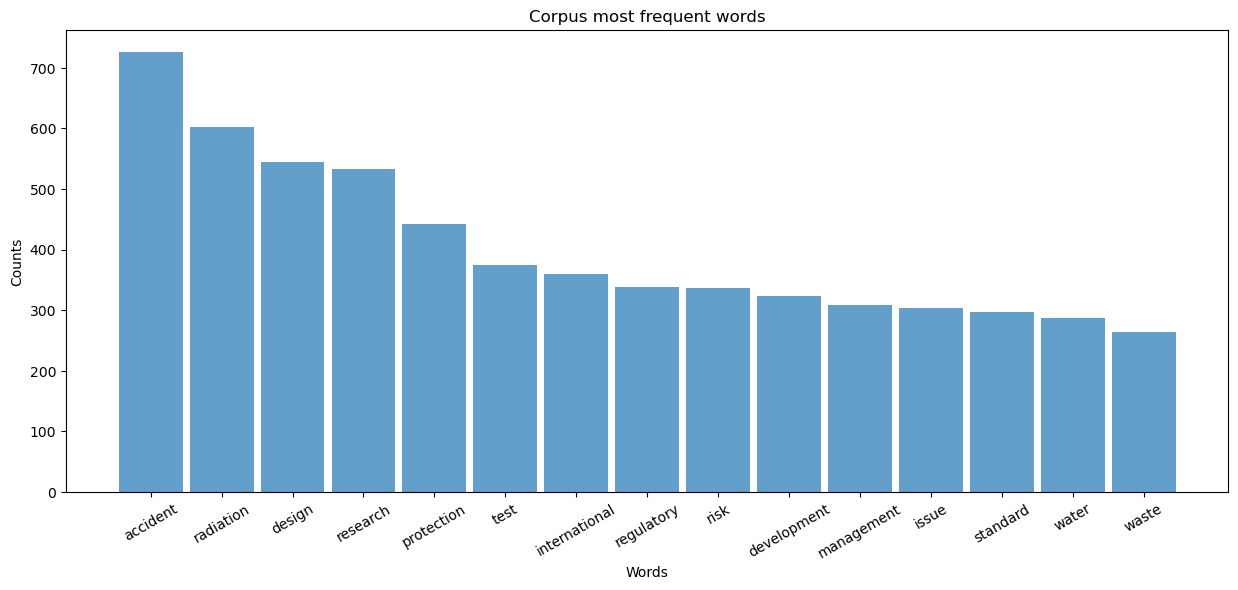

In [73]:
def separate(combined): #separate the labels and the frequencies to be input to the bar plot
    features = []
    frequencies = []

    for feature, frequency in combined:
        features.append(feature)
        frequencies.append(frequency)

    return features, frequencies

features, frequencies = separate(most_frequent)

plt.figure(figsize=(15, 6))
plt.bar(features, frequencies, align='center', alpha=0.7, width=0.9)

#Add title, labels and adjust size
plt.title('Corpus most frequent words')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.xticks(rotation=30)
plt.show()

### Hierarchical clustering

Compute the tf-idf matrix. It is an embedding technique necessary to determine the similarity among documents.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer() 
list_abstracts = df0['englishAbstract'].to_list() #transform the column of interest into a list
abstracts_joined=[]

for i in list_abstracts: #concatenate tokens (not separated by commas) to obtain a valid argument for the vectorizer function
    abstracts_joined.append(" ".join(i))

X = vectorizer.fit_transform(abstracts_joined).toarray() # compute the tf-idf matrix 
X.shape

(1250, 10764)

Build a dendrogram from the tf-idf matrix.

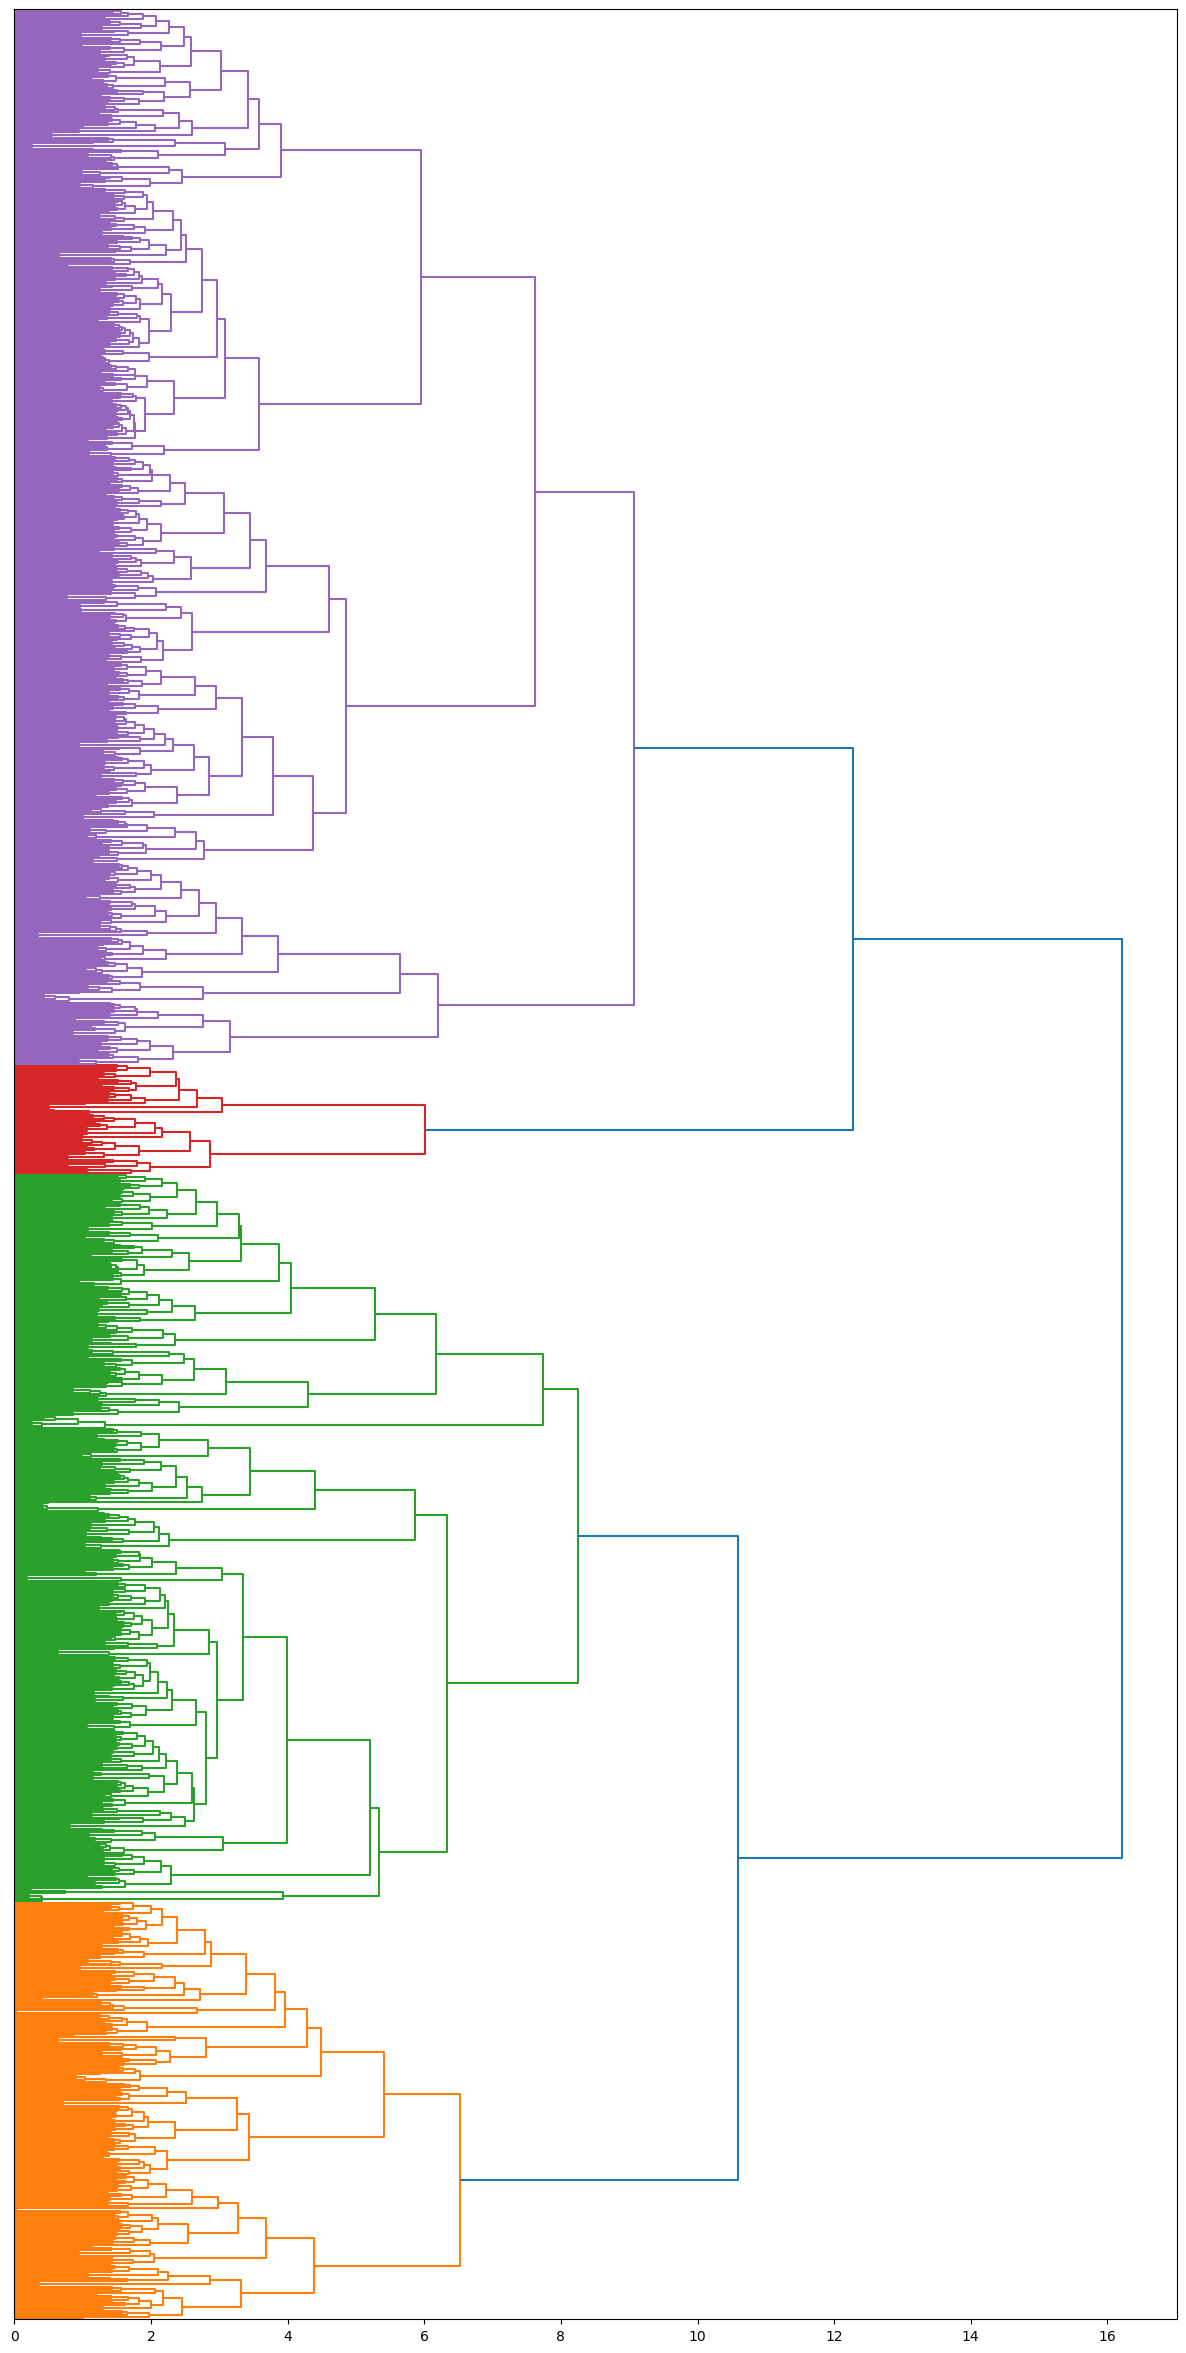

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

dist = 1 - cosine_similarity(X) #cosine distance
linkage_matrix = linkage(dist, method='ward') #minimizes the total within cluster variance
ax = plt.subplots(figsize=(15, 30)) # set size
ax = dendrogram(linkage_matrix,color_threshold=10, orientation="right", no_labels=True) #compute and show the dendrogram 

Add a column reporting the cluster label

In [76]:
pd.set_option('display.max_colwidth', 1000000)
from scipy.cluster.hierarchy import fcluster
fl = fcluster(linkage_matrix,4,criterion='maxclust')
df0['cluster'] = fl.tolist() #add cluster labels to the dataframe
df0.head(5) #check

,author,englishTitle,englishAbstract,publicationYear,cluster
0,"Mariani, L.P.",Commentary on the cost of nuclear safety,"[although, adequate, level, nuclear, safety, attain, societal, institutional, approach, take, united, state, safely, harvest, fruit, nuclear, power, technology, beset, economic, inefficiency, paper, discus, difficulty, nuclear, regulation, complexity, politicization, overall, decisionmaking, process, public, acceptance, key, economical, attainment, nuclear, safety, objective, alone, fuel, federal, state, government, expeditiously, move, toward, would, perceive, public, mandate, nuclear, utilization]",1991,2
1,"Corcoran, W.R. (TENERA Risk Management Services, Windsor, CT (United States))",Nuclear utility self-assessment as viewed by the corporate nuclear safety committee,"[paper, discus, corporate, nuclear, safety, committee, use, principle, selfassessment, enhance, nuclear, power, plant, safety, performance, corporate, nuclear, safety, committee, function, advise, senior, nuclear, power, executive, matter, affect, nuclear, safety, committee, require, administrative, control, section, plant, technical, specification, part, final, safety, analysis, report, operating, license, committee, membership, include, senior, utility, executive, executive, sister, utility, utility, senior, technical, expert, outside, consultant, current, corporate, nuclear, safety, committee, often, finely, tune, intuitive, feel, selfassessment, use, probe, underlie, opportunity, quality, safety, enhancement, question, prompt, selfassessment, orientation, enable, utility, line, organization, member, gain, well, perspective, characteristic, organizational, system, manage, work]",1992,2
2,"Birkhofer, A. (Gesellschaft fuer Reaktorsicherheit Forschungsgelaende, Garching (Germany))",The use of probabilistic safety assessments for improving nuclear safety in Europe,"[political, change, europe, broaden, scope, international, nuclear, safety, matter, considerably, western, world, start, receive, reliable, increasingly, detailed, information, eastern, european, nuclear, technology, take, note, broad, range, technical, administrative, problem, relevant, nuclear, safety, country, reunification, make, germany, focus, information, exchange, matter, cooperation, former, german, democratic, republic, eastern, european, country, well, safety, analysis, sovietbuilt, nuclear, power, plant, start, rather, early, meanwhile, activity, progress, toward, alleuropean, cooperation, nuclear, safety, sector, cooperation, include, use, probabilistic, safety, assessment, psa, address, application, western, eastern, europe, well, development, methodology, converge, europe]",1992,2
3,"Barker, F.",The 'tolerability' of nuclear risk?,"[1988, respond, recommendation, inspector, sizewell, b, public, inquiry, health, safety, executive, hse, publish, discussion, document, tolerability, risk, inspector, consider, insufficient, public, information, allow, understand, basis, regulation, nuclear, safety, recommend, hse, publish, document, enable, public, expert, parliamentary, discussion, although, discussion, document, go, long, way, explain, hse, reach, decision, nuclear, safety, clear, useful, way, proposal, level, maximum, tolerable, risk, widely, criticise, particularly, hinkley, point, c, public, inquiry, explain, article, inquiry, inspector, michael, barnes, accepted, number, point, make, objector, suggest, stringent, level, maximum, tolerable, risk, october, 1992, hse, publish, revise, version, tolerability, risk, report, contains, significant, change, discussion, propose, level, maximum, tolerable, individual, ...]",1992,2
4,"Queener, D.S. (Oak Ridge National Lab., TN (United States))","Reports, standards, and safety guides","[article, contains, four, list, various, document, relevant, nuclear, safety, compile, editor, list, 1, reactor, operationsrelated, report, u, origin, 2, book, report, 3, regulatory, guide, 4, nuclear, standard, list, contains, document, category,

Investigate the polarity and the most important words of each cluster

In [77]:
import numpy as np
features = vectorizer.get_feature_names_out() 
scores = []

for word in tqdm(features): #polarity score for each token
    scores.append(sentiwn_score(word))

for i in range (1, 5): #4 clusters
    mean_year=df0.loc[df0['cluster'] == i, 'publicationYear'].mean() #compute the average pubblication year
    list_abstracts = df0.loc[df0['cluster'] == i, 'englishAbstract'].to_list() #select abstracts of cluster i
    
    T=X[df0.loc[df0['cluster']==i].index.to_list(),] #tf-idf matrix of cluster i
    
    overall_importance = np.asarray(T.sum(axis=0)).ravel() #importance of a feature within the cluster
    feature_names = np.array(vectorizer.get_feature_names_out()) 
    
    sorted_indices = np.argsort(overall_importance)[::-1] #sort by relevance
    
    n = 15  # Set the desired number of significant terms to be retrieved for each cluster
    final_top=[]
    
    top_terms=feature_names[sorted_indices][:50].tolist()
    final_top=[x for x in top_terms if x not in exclusion] #exclude some uninformative words
    
    final_top=final_top[:n]
    Tsw = T * scores #combine polarity scores with words relevance scores
    t=Tsw.sum(1)/(Tsw != 0).sum(1) #compute the polarity of each document
    polarity=np.mean(t) #compute the polarity of the cluster 
    
    print("The most relevant words in cluster", i, "are, in order:", final_top, 
          "The mean polarity is:", polarity, "The mean year is:", mean_year, 
          "The documents in the cluster are",sum(df0['cluster']==i))

100%|██████████████████████████████████████████████████████████████████████████| 10764/10764 [00:10<00:00, 1055.46it/s]


The most relevant words in cluster 1 are, in order: ['accident', 'risk', 'design', 'public', 'severe', 'iaea', 'management', 'probabilistic', 'fukushima', 'research', 'development', 'approach', 'country', 'psa', 'event'] The mean polarity is: 0.0025540822212896355 The mean year is: 2008.353982300885 The documents in the cluster are 226
The most relevant words in cluster 2 are, in order: ['radiation', 'waste', 'international', 'protection', 'regulatory', 'management', 'european', 'convention', 'state', 'country', 'research', 'culture', 'programme', 'regulation', 'iaea'] The mean polarity is: 0.0037037854527559835 The mean year is: 2004.1395939086294 The documents in the cluster are 394
The most relevant words in cluster 3 are, in order: ['cladding', 'rod', 'condition', 'test', 'burnup', 'ria', 'pellet', 'nsrr', 'pulse', 'failure', 'research', 'deformation', 'temperature', 'irradiation', 'pcmi'] The mean polarity is: 0.00029366078054501464 The mean year is: 2005.9661016949153 The documen

### Latent Dirichlet Allocation

It is an unsupervised method to detect the topics (established ex ante) to which a document refers. It is based on a bayesian approach assuming words independence. It is a generative probabilistic model. The number of clusters is input based on the otucome of hierarchical clustering. 

In [98]:
from gensim import corpora, models, similarities 
dictionary = corpora.Dictionary(df0['englishAbstract']) #creates a vocaboulary over the preprocessed data (bag of words)
corpus = [dictionary.doc2bow(text) for text in df0['englishAbstract']] #(word's id, frequency)

lda = models.LdaModel(corpus, 
                      num_topics=4, #uses variational bayes instead of gibbs since it is faster
                      random_state=12, #replicability
                      id2word=dictionary,
                      update_every=5, 
                      chunksize=5,
                      passes=100) #iterations

Check the most representative words for each topics

In [99]:
for topic in range(4):
    final_topic=[x for x, y in lda.show_topic(topic, topn=50) if x not in exclusion]
    print("Topic {}".format(topic))
    print(final_topic[:20])

Topic 0
['test', 'heat', 'condition', 'flow', 'water', 'simulation', 'temperature', 'core', 'accident', 'experimental', 'rod', 'experiment', 'calculation', 'parameter', 'thermal', 'cool', 'cladding', 'effect', 'transient', 'containment']
Topic 1
['radiation', 'waste', 'international', 'protection', 'agency', 'iaea', 'state', 'programme', 'environmental', 'management', 'country', 'european', 'atomic', 'research', 'decommission', 'radiological', 'regulation', 'sector', 'regulatory', 'cooperation']
Topic 2
['design', 'accident', 'risk', 'development', 'issue', 'research', 'event', 'approach', 'support', 'control', 'regulatory', 'well', 'npp', 'make', 'public', 'important', 'need', 'improve', 'technology', 'security']
Topic 3
['radiation', 'dose', 'neutron', 'measurement', 'iter', 'protection', 'measure', 'monitoring', 'field', 'sample', 'exposure', 'standard', 'dos', 'radiological', 'source', 'value', 'detector', 'image', 'dosimetry', 'beam']


Count the documents belonging to each topic considering the most dominant within each probability distribution.

In [100]:
document_topics = [lda[doc] for doc in corpus] #topic distributions of the docs.

dominant_topics = []
for doc_topics in document_topics:
    dominant_topic = max(doc_topics, key=lambda item: item[1]) #take the greatest probability
    dominant_topics.append(dominant_topic)

count_0 = sum(map(lambda x : x == 0, [x[0] for x in dominant_topics]))
count_1= sum(map(lambda x : x == 1, [x[0] for x in dominant_topics]))
count_2 = sum(map(lambda x : x == 2, [x[0] for x in dominant_topics]))
count_3 = sum(map(lambda x : x == 3, [x[0] for x in dominant_topics]))

print("The documents referring to topic 0 are:", count_0)
print("The documents referring to topic 1 are:", count_1)
print("The documents referring to topic 2 are:", count_2)
print("The documents referring to topic 3 are:", count_3)

The documents referring to topic 0 are: 269
The documents referring to topic 1 are: 198
The documents referring to topic 2 are: 612
The documents referring to topic 3 are: 171


Apply LDA to an unseen document.

In [101]:
import re
unseen = open("unseen.txt", "r").read()
unseen_prepro = tokenize(re.sub(r'[^\w\s]', '', unseen)) #preprocessing 
bow_vector = dictionary.doc2bow(unseen_prepro)
print(unseen)

topic_distribution = lda[bow_vector]

for topic, prob in topic_distribution: #retrieve the topic mixture
    print(f"Topic {topic}: {prob:.4f}")

Fuel cladding, the protective shield around nuclear fuel pellets in reactors, is essential for nuclear power plant safety. However, it can pose challenges when compromised, leading to accidents. Fuel cladding serves to contain radioactive materials, ensuring they do not escape into the environment. It also maintains fuel rod structural integrity under extreme conditions. Historical nuclear disasters, like Chernobyl and Fukushima, underscore the importance of fuel cladding. Failures in cladding contributed to the severity of these accidents. Stringent international safety standards, advanced materials, and proactive measures, such as inspections and research, help mitigate fuel cladding-related risks. As the world seeks sustainable energy, nuclear power remains an option. Prioritizing fuel cladding integrity, adhering to safety standards, and continuous research are essential to secure the future of nuclear power while ensuring public safety.
Topic 0: 0.2975
Topic 1: 0.0850
Topic 2: 0.6

LDA with bigrams.

In [82]:
from nltk.util import bigrams
bigram_tokens=[list(bigrams(doc)) for doc in df_preprocessed] #corpus of bigrams 
bigrams_tokens = [[" ".join(bigram) for bigram in doc]for doc in bigram_tokens] #joining bigrams
dictionary1 = corpora.Dictionary(bigrams_tokens)
corpus1 = [dictionary1.doc2bow(text) for text in bigrams_tokens]

from gensim.models import LdaModel
lda1=models.LdaModel(corpus1, random_state=123, chunksize=50, num_topics=4, id2word=dictionary1, passes=100)

In [83]:
for topic1 in range(4):
    final=[x for x, y in lda1.show_topic(topic1, topn=50) if x not in exclusion]
    print("Topic {}".format(topic1))
    print(final[:20])

Topic 0
['severe accident', 'safety assessment', 'water reactor', 'probabilistic safety', 'heat transfer', 'fission product', 'pressure vessel', 'accident management', 'cool system', 'source term', 'heat removal', 'core damage', 'pressurize water', 'risk assessment', 'steam generator', 'accident scenario', 'reactor pressure', 'flow rate', 'paper present', 'reactor safety']
Topic 1
['radiation protection', 'radioactive waste', 'fuel rod', 'research reactor', 'waste management', 'safety standard', 'spent fuel', 'energy agency', 'safety culture', 'reactor nsrr', 'member state', 'use nuclear', 'nuclear installation', 'pwr fuel', 'ria condition', 'nuclear technology', 'radioactive material', 'high burnup', 'nuclear security', 'japan atomic']
Topic 2
['nuclear fuel', 'monte carlo', 'nuclear facility', 'fuel cycle', 'safety commission', 'risk perception', 'canadian nuclear', 'paper present', 'radioactive waste', 'public acceptance', 'finite element', 'control rod', 'fuel element', 'department

### Joint Sentiment-Topic (based on gibbs instead)

Import the required libraries

In [84]:
import jointtsmodel
from jointtsmodel.JST import JST
from jointtsmodel.utils import *
from sklearn.feature_extraction.text import CountVectorizer

inv_features = dict(zip(features,np.arange(len(features))))
lexicon_dict = dict(zip(features, scores)) #sentiwordnet scores as prior info

lexicon_data = pd.read_excel('prior_sentiment.xlsx') #different soruce for prior sentiment info
lexicon_data = lexicon_data.dropna()
lexicon_dict1 = dict(zip(lexicon_data['Word'],lexicon_data['Sentiment']))


vectorizer = CountVectorizer() #report frequencies, different from tfidf
M = vectorizer.fit_transform(abstracts_joined)

model = JST(n_topic_components=4,n_sentiment_components=2,random_state=123,evaluate_every=5, max_iter=30)
model.fit(M.toarray(), lexicon_dict1)

Perplexity after iteration 5 (out of 30 iterations) is 6019.14
Perplexity after iteration 10 (out of 30 iterations) is 4965.82
Perplexity after iteration 15 (out of 30 iterations) is 4167.85
Perplexity after iteration 20 (out of 30 iterations) is 3827.91
Perplexity after iteration 25 (out of 30 iterations) is 3628.21
Perplexity after iteration 30 (out of 30 iterations) is 3509.40


In [85]:
final_list=[]
top_words = list(model.getTopKWords(features, 50).values())
for sublist in top_words:
    final_sublist = []
    for word in sublist:
        if word not in exclusion:
            final_sublist.append(word)
    final_list.append(final_sublist)
    
print(final_list)

[['neutron', 'heat', 'flow', 'water', 'temperature', 'cool', 'experiment', 'thermal', 'experimental', 'core', 'pressure', 'consider', 'investigate', 'effect', 'low', 'transfer', 'increase', 'characteristic', 'calculation', 'assembly', 'rate', 'parameter', 'vessel', 'test', 'show', 'algorithm', 'design', 'different', 'image', 'measurement', 'element', 'passive', 'solution'], ['test', 'condition', 'cladding', 'rod', 'water', 'release', 'research', 'sample', 'measure', 'irradiation', 'gas', 'concentration', 'calculate', 'measurement', 'two', 'comparison', 'fission', 'product', 'temperature', 'behavior', 'show', 'calibration', 'experiment', 'value', 'time', 'obtain', 'radon', 'beam', 'failure', 'estimate', 'rate', 'pulse', 'dose', 'burnup', 'transient'], ['radiation', 'protection', 'dose', 'radiological', 'exposure', 'field', 'source', 'monitoring', 'dosimetry', 'information', 'irsn', 'standard', 'french', 'authority', 'worker', 'australian', 'different', 'reference', 'arpansa', 'measureme

### RJST

In [86]:
from jointtsmodel.RJST import RJST
model1 = RJST(n_topic_components=4,n_sentiment_components=2,random_state=123,evaluate_every=5, max_iter=30)
lexicon_data = pd.read_excel('prior_sentiment.xlsx')
lexicon_data = lexicon_data.dropna()
lexicon_dict = dict(zip(features, scores)) #sentiwordnet scores as prior info
lexicon_dict1 = dict(zip(lexicon_data['Word'],lexicon_data['Sentiment']))

model1.fit(M.toarray(), lexicon_dict1)

Perplexity after iteration 5 (out of 30 iterations) is 5961.79
Perplexity after iteration 10 (out of 30 iterations) is 5113.36
Perplexity after iteration 15 (out of 30 iterations) is 4452.60
Perplexity after iteration 20 (out of 30 iterations) is 4103.02
Perplexity after iteration 25 (out of 30 iterations) is 3911.72
Perplexity after iteration 30 (out of 30 iterations) is 3852.42


In [87]:
final_list1=[]
top_words1 = list(model1.getTopKWords(features, 40).values())
for sublist in top_words1:
    final_sublist1 = []
    for word in sublist:
        if word not in exclusion:
            final_sublist1.append(word)
    final_list1.append(final_sublist1)

print(final_list1)

[['radiation', 'neutron', 'dose', 'measurement', 'standard', 'protection', 'source', 'field', 'measure', 'exposure', 'radiological', 'reference', 'dosimetry', 'dos', 'value', 'concentration', 'sample', 'arpansa', 'australian', 'laboratory', 'calibration', 'beam', 'image', 'service', 'quality', 'radon', 'irsn', 'two', 'effective', 'comparison', 'test', 'increase'], ['accident', 'public', 'regulatory', 'industry', 'standard', 'issue', 'culture', 'fukushima', 'risk', 'change', 'management', 'make', 'international', 'emergency', 'experience', 'need', 'operator', 'strategy', 'policy', 'severe', 'national', 'technical', 'measure', 'japan', 'action', 'framework', 'acceptance'], ['water', 'test', 'condition', 'temperature', 'heat', 'flow', 'experiment', 'experimental', 'core', 'accident', 'rod', 'research', 'thermal', 'cladding', 'transient', 'cool', 'calculation', 'containment', 'coolant', 'pressure', 'transfer', 'simulation', 'failure', 'behavior', 'low'], ['design', 'risk', 'security', 'app